Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans

In [2]:
cars = pd.read_csv('cars-dataset.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


* Cars dataset has 398 entries with 7 columns/features and 1 target variable(mpg)
* There are no missing values.
* hp (horsepower) is of type object, When it should actually be a numeric value

In [3]:
cars.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


* Since the values of hp column is of object type the describe function doesn't include it. But to predict the target variable mpg, it may be an important feature. Checking for the values which are not numeric in hp field

In [4]:
cars.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
127,amc hornet,6,232.0,100,2901,16.0,74,19.0
391,dodge charger 2.2,4,135.0,84,2370,13.0,82,36.0
229,pontiac grand prix lj,8,400.0,180,4220,11.1,77,16.0
137,buick century luxus (sw),8,350.0,150,4699,14.5,74,13.0
337,honda accord,4,107.0,72,2290,17.0,80,32.4


In [5]:
cars[cars.hp.str.isdigit()==False]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


__Missing values are marked as '?' in hp field. Hence replacing the '?' with mean of hp values__

In [6]:
cars['hp'].replace('?', np.nan, inplace=True)
cars['hp'] = cars['hp'].astype('float64')
cars['hp'].fillna(cars['hp'].mean(), inplace=True)

In [7]:
cars.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


* Missing values are treated with mean values.

Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

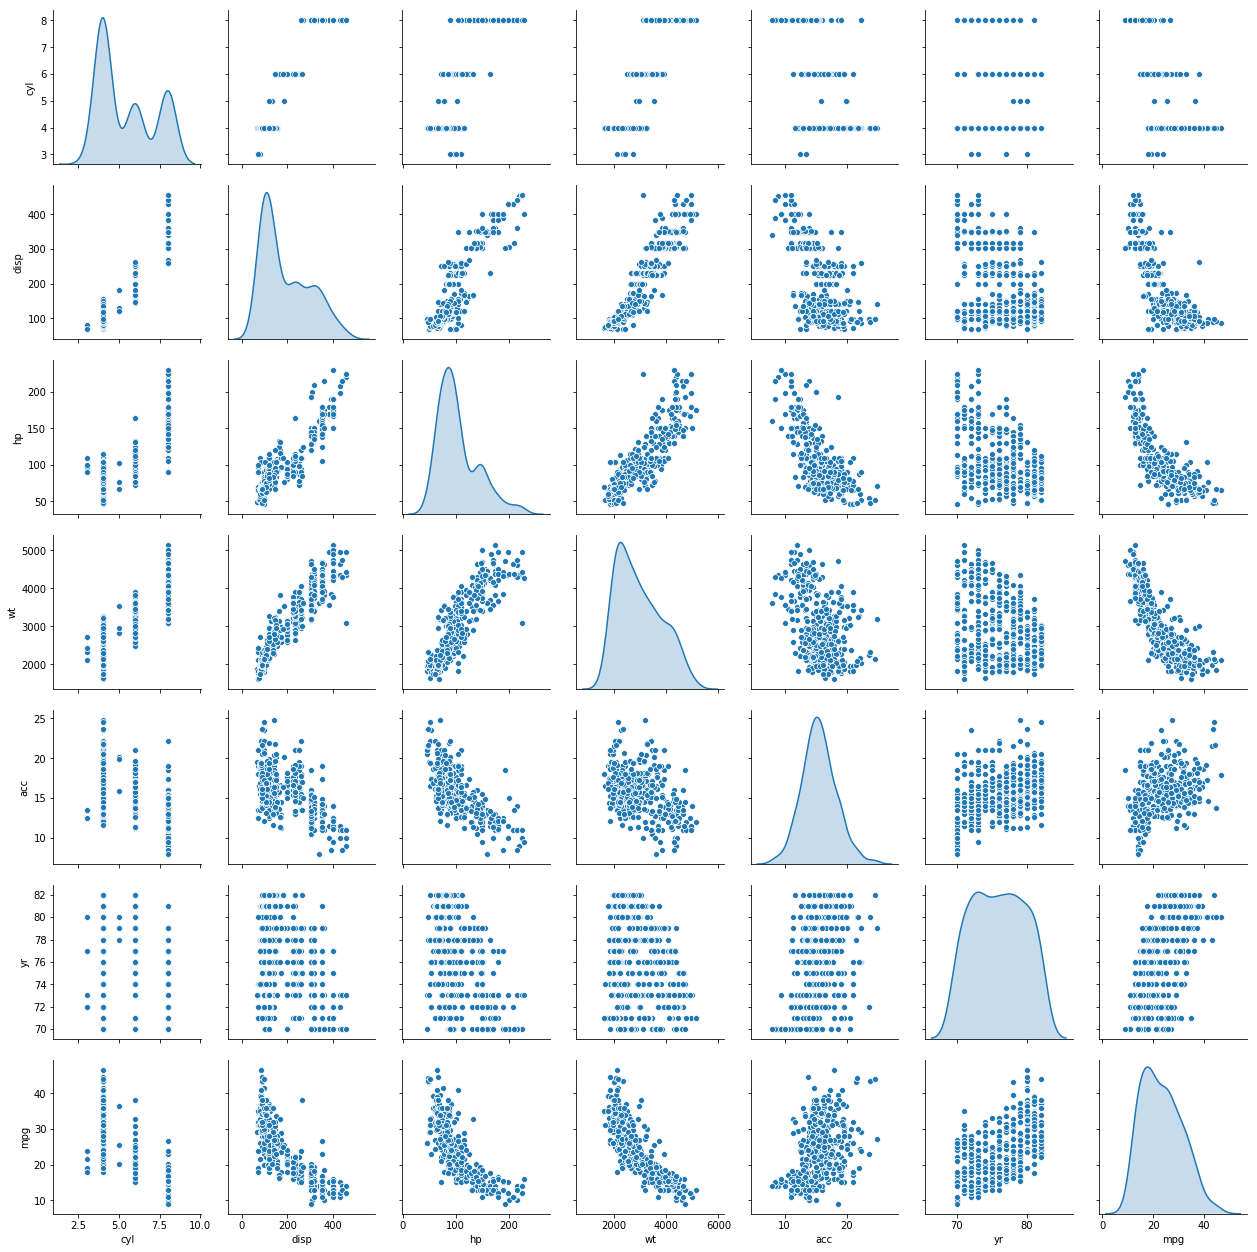

In [8]:
cars_attr = cars.iloc[:, 1:8]
# cars_attr = cars.drop('mpg', axis=1)
sns.pairplot(cars, diag_kind='kde') 

* cyl has	3 clusters
* disp has 3 clusters
* hp has 3 clusters
* wt has 2 clusters
* acc has 1 cluster
* yr has 2 clusters
* mpg has 2 clusters

So, We should be having a minimum of 3 clusters.

Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [9]:
from scipy.stats import zscore

cars_attr_z = cars_attr.apply(zscore)

In [10]:
cars_attr_z.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-8.312725e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
hp,398.0,4.287469e-16,1.001259,-1.532571,-0.746226,-0.248207,0.538138,3.290348
wt,398.0,-9.902743e-17,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
yr,398.0,-8.837152e-16,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335


In [11]:
cluster_range = range(2, 7)   # as found by visual inspection, setting the range from 2 to 7
cluster_errors = []

for num_clusters in cluster_range:
    
    clusters = KMeans(num_clusters, n_init = 5, random_state=7)
    clusters.fit(cars_attr_z)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)
    
clusters = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters.head(10)

,num_clusters,cluster_errors
0,2,1296.651197
1,3,948.058251
2,4,740.069666
3,5,666.663445
4,6,605.658592


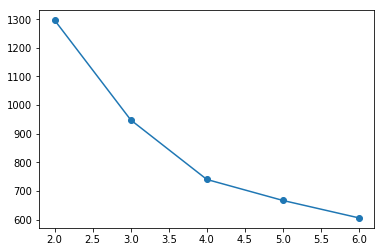

In [12]:
# plt.figure(figsize=(12,6))
plt.plot(clusters.num_clusters, clusters.cluster_errors, marker = "o")

* The elbow plot confirms the pairplot analysis that there are either 3 or 4 clusters
* Assuming clusters count as 3, since most of the features showed 3 clusters.

In [13]:
cluster = KMeans(n_clusters = 3, random_state = 7)
cluster.fit(cars_attr_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [14]:
pd.DataFrame(cluster.cluster_centers_, index=['Centroid1','Centroid2','Centroid3'], columns=cars_attr.columns)

,cyl,disp,hp,wt,acc,yr,mpg
Centroid1,-0.839382,-0.833572,-0.790463,-0.854138,0.444668,0.805735,1.094021
Centroid2,1.486419,1.468657,1.469958,1.367364,-1.033718,-0.611986,-1.127260
Centroid3,-0.201055,-0.194963,-0.233468,-0.113278,0.261402,-0.319488,-0.247440


In [15]:
prediction = cluster.predict(cars_attr_z)
cars_attr_z["GROUP"] = prediction
cars_attr["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211F7DFDDA0>,
      dtype=object)

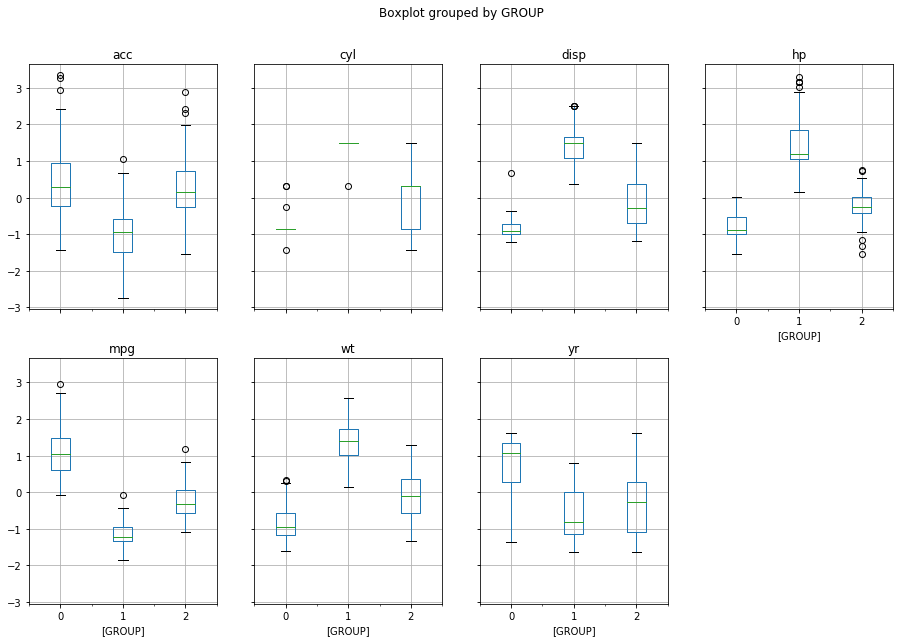

In [16]:
cars_attr_z.boxplot(by='GROUP', layout=(2,4), figsize=(15, 10))

Observations:
There are many outliers on each dimension (indicated by the black circles)
Spread of data on each dimension (indicated by the whiskers is long due to the outliers)
If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)

In [17]:
def HandleOutlier(group):
    median, std = group.median(), group.std()
    outliers = (group - median).abs() > 2*std
    group[outliers] = group.median()
    return group

cars_attr_z = (cars_attr_z.groupby('GROUP').transform(HandleOutlier)).join(pd.DataFrame(cars_attr_z['GROUP']))
cars_attr_z

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.834543,1
5,1.498191,2.262118,2.451579,1.620492,-2.021656,-1.627426,-1.090751,1
6,1.498191,1.503514,1.193426,1.635863,-0.932419,-1.627426,-1.218855,1
7,1.498191,2.367746,1.193426,1.586204,-0.932419,-1.627426,-1.218855,1
8,1.498191,1.503514,1.193426,1.719809,-2.021656,-1.627426,-1.218855,1
9,1.498191,1.887617,2.241887,1.039961,-0.932419,-1.627426,-1.090751,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211F85DF6A0>,
      dtype=object)

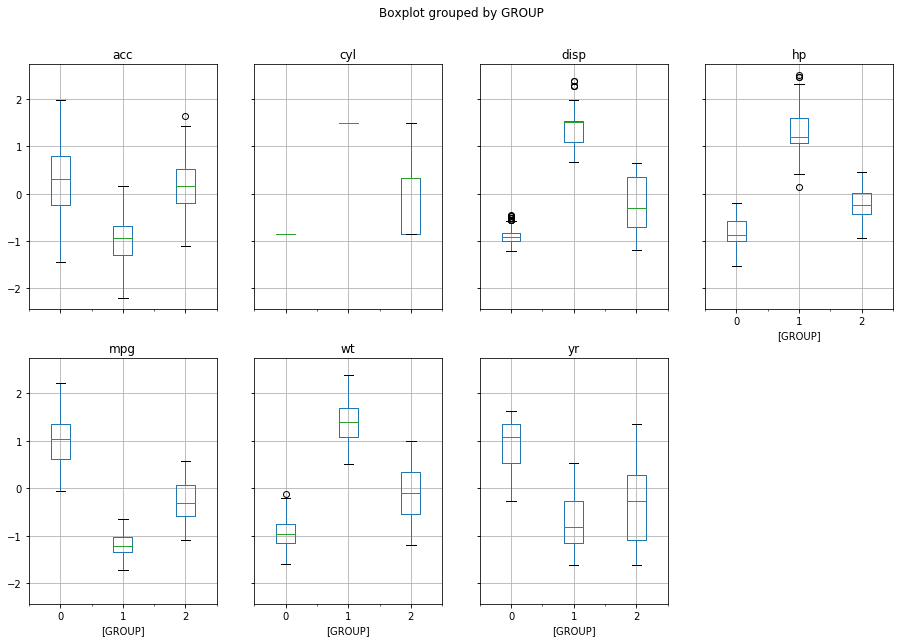

In [18]:
cars_attr_z.boxplot(by='GROUP', layout=(2,4), figsize=(15, 10))

On removing the outliers by replacing with median or mean, the distribution changes. The new distribution creates new outliers which are comparatively closer to the centre than the already existent outliers. 

Except in acceleration and year, the box plots are not overlapping.

Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [19]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# Since we will be using the linear regression individually for each cluster creating it as function
def LinearRegModel(data):
    X = data.drop('mpg', axis=1)
    X = X.drop('GROUP', axis=1)
    y = data[['mpg']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    
    reg_mdl = LinearRegression()
    reg_mdl.fit(X_train, y_train)
    
    train_score = reg_mdl.score(X_train, y_train)
    test_score = reg_mdl.score(X_test, y_test)
    
    coef = []
    for i, col in enumerate(X_train.columns):
        coef.append({'Attribute': col, 'Coefficient': reg_mdl.coef_[0][i] })
    
    coef = pd.DataFrame(coef)
    
    return [train_score, test_score, coef]

In [20]:
clstr1 = cars_attr_z[cars_attr_z['GROUP']==0]
clstr1.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
51,-0.856321,-1.098783,-0.903495,-1.059883,1.427593,1.080415,0.830809,0
53,-0.856321,-1.175603,-1.034553,-1.415768,1.246054,1.080415,0.958913,0
54,-0.856321,-1.166001,-0.929706,-1.604943,0.882975,1.080415,1.471329,0
102,-0.856321,-0.925936,-1.532571,-1.206493,1.972212,1.080415,0.318393,0
117,-0.856321,-1.204411,-1.453937,-1.304628,1.427593,1.080415,0.702705,0


In [21]:
train_score1, test_score1, coef1 = LinearRegModel(clstr1)
print('Train data accuracy:', train_score1)
print('Test data accuracy:', test_score1)
coef1

Train data accuracy: 0.32539558144751446
Test data accuracy: 0.32983192647861315


,Attribute,Coefficient
0,cyl,0.000000
1,disp,-0.098888
2,hp,-0.178324
3,wt,-0.714476
4,acc,-0.164688
5,yr,0.402821


In [22]:
clstr2 = cars_attr_z[cars_attr_z['GROUP']==1]
clstr2.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.834543,1


In [23]:
train_score2, test_score2, coef2 = LinearRegModel(clstr2)
print('Train data accuracy:', train_score2)
print('Test data accuracy:', test_score2)
coef2

Train data accuracy: 0.4158725684932688
Test data accuracy: -0.3779886012398559


,Attribute,Coefficient
0,cyl,0.343628
1,disp,0.069522
2,hp,-0.074207
3,wt,-0.338820
4,acc,-0.035903
5,yr,0.078333


In [24]:
clstr3 = cars_attr_z[cars_attr_z['GROUP']==2]
clstr3.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
14,-0.856321,-0.772295,-0.248207,-0.707544,-0.206262,-1.627426,0.062185,2
15,0.320935,0.043923,-0.248207,-0.162483,-0.024722,-1.627426,-0.194023,2
16,0.320935,0.053526,-0.195784,-0.232242,-0.024722,-1.627426,-0.706439,2
17,0.320935,0.063128,-0.510322,-0.453340,0.156817,-1.627426,-0.322127,2
18,-0.856321,-0.925936,-0.431688,-0.993671,-0.387801,-1.627426,0.446497,2


In [25]:
train_score3, test_score3, coef3 = LinearRegModel(clstr3)
print('Train data accuracy:', train_score3)
print('Test data accuracy:', test_score3)
coef3

Train data accuracy: 0.5242234881223158
Test data accuracy: 0.3964315067609602


,Attribute,Coefficient
0,cyl,-0.037325
1,disp,-0.284627
2,hp,-0.159173
3,wt,-0.302886
4,acc,0.026546
5,yr,0.130607


Accuracy achieved for each cluster in Linear Regression is not comparable to that of the performance of K-Means clustering model